# AIA data visualization

Be sure to install abwoc and sunpy:
```
pip install git+https://github.com/PHYS477677/abwoc
pip install sunpy
```
And get the sample data with
```
curl -LJO https://github.com/PHYS477677/abwoc/raw/master/sample-data/sample-fits.zip yourDirectory
```
or download directly from https://github.com/PHYS477677/abwoc/raw/master/sample-data/sample-fits.zip and unzip the files to get started.

#### First, some setup:

In [1]:
import abwoc.visualization as vis
from abwoc.data_loading import fetch_aia, reduce
import sunpy.map

Let's define what images to get and where to get them from

In [2]:
direc = 'AIAfiles'

#Random time that happens to have an x-ray flare
date = '2020_08_19'
time = '22_46'

Then grab the images from the directory using the abwoc ```grab()``` tool. ```download``` can be set to ```True``` to download any missing images.

In [3]:
wvs = ['94','131','171','193','211','304','335','1600','1700'] #AIA wavelengths
files = [fetch_aia.grab(direc, w, date, time, download=False) for w in wvs]

#Turn the .fits files into SunPy Map objects, which are easy ways to work with solar images
smap = [sunpy.map.Map(f) for f in files] 

Now it's easy to display all wavelengths at this time:

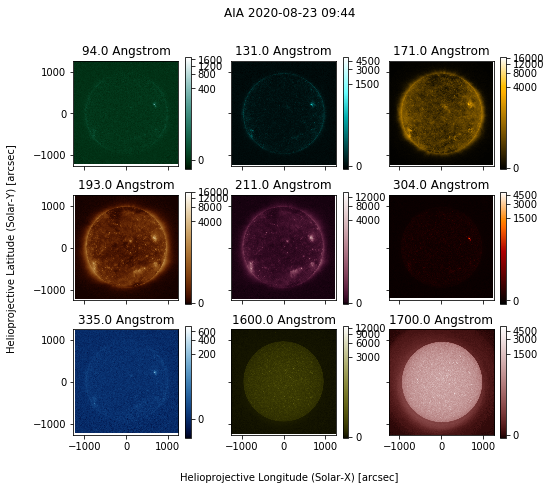

In [4]:
vis.plots(smap)

We can also display only the wavelengths we're interested in by passing in a shorter list

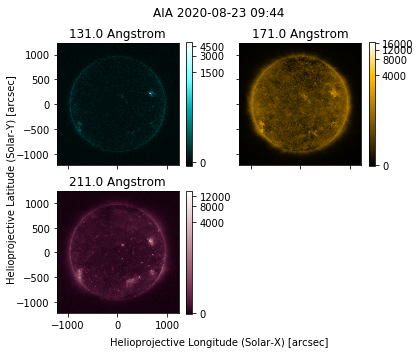

In [5]:
wvs = ['131','171','211']
files = [fetch_aia.grab(direc, w, date, time) for w in wvs]
smap = [sunpy.map.Map(f) for f in files] 

vis.plots(smap)

### Zooming in

Abwoc also lets you zoom in on a region of the Sun.

Especially handy for seeing what flares actually look like.

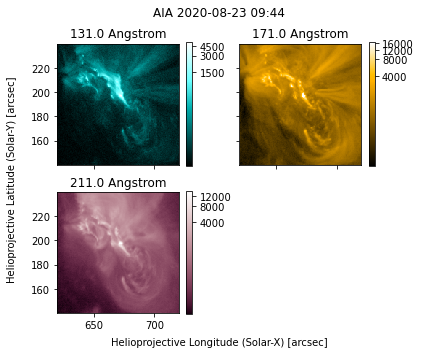

In [6]:
#region of interest: a rectangle of width xlength, height ylength, and bottom left corner at x0,y0
xlength = 100
ylength = 100
x0 = 620
y0 = 140

vis.plot_zoom(smap,x0,y0,xlength,ylength)

### Downsampling

And finally, we can see the effects of downsampling the image on the appearance of the flare by using ```reduce_map()```.

While ```reduce()``` is available to downsample a numpy array, ```reduce_map()``` also edits the image metadata to provide accurate axis scaling.

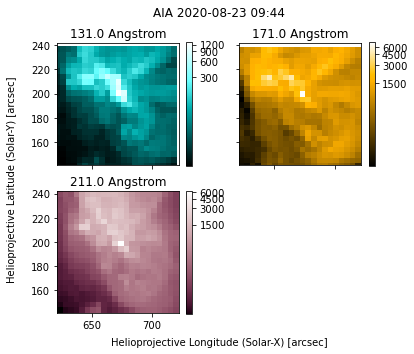

In [7]:
downsample = 8 #Reduce image size by factor of 8, i.e., from 4096x4096 to 512x512

for i in range(len(smap)):
    smap[i] = reduce.reduce_map(smap[i], downsample)

vis.plot_zoom(smap,x0,y0,xlength,ylength)